In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [3]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [6]:
def model_info(y_real, y_pred, labels=['B', 'D', 'M', 'NK', 'T']):
    cm = confusion_matrix(y_real, y_pred)
    class_sums = cm.sum(axis=1)
    normalized_conf_matrix = cm / class_sums[:, np.newaxis]
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='.2f')
    plt.xlabel('Predvidjene vrednosti')
    plt.ylabel('Stvarne vrednosti')
    plt.title('Matrica konfuzije')
    plt.show()

    print('Matrica konfuzije: \n', cm)
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='weighted', zero_division=0))
    print('Recall score: ', recall_score(y_real, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_real, y_pred, average='weighted'))

In [7]:
def build_model(model, X_train, X_test, y_train, y_test, classes=['B', 'D', 'M', 'NK', 'T']):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    model_info(y_test, y_pred, classes)

    return model

In [8]:
from sklearn.neural_network import MLPClassifier

model_bs1 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=55, batch_size=32)

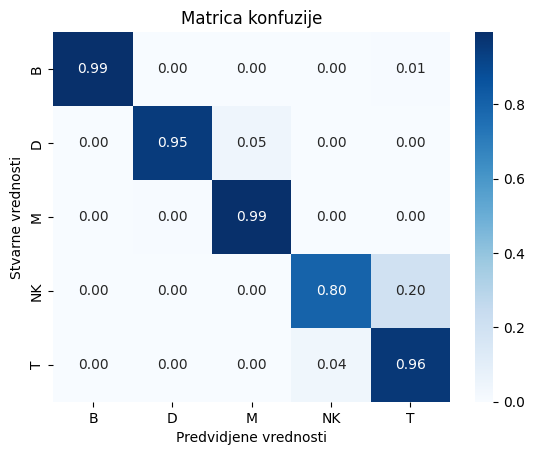

Matrica konfuzije: 
 [[ 513    0    1    0    4]
 [   0   39    2    0    0]
 [   1    2  493    0    0]
 [   1    0    0  313   78]
 [   1    0    1   99 2407]]
Accuracy score:  0.9519595448798989
Precision score:  0.9530154972002546
Recall score:  0.9519595448798989
F1 score:  0.9524302931306735


In [10]:
model_bs1 = build_model(model_bs1, X_train, X_test, y_train, y_test)

In [11]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 15, 30],
#     'min_samples_split': [2, 5, 10],
# }

# model = RandomForestClassifier(criterion='entropy', random_state=55)
# grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3, verbose=2)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# best_model = RandomForestClassifier(**best_params)
# best_model.fit(X_train, y_train)

In [12]:
# best_params, best_score

In [13]:
best_params = {'hidden_layer_sizes': (100, 100), 'max_iter': 1000, 'random_state': 55}
best_model = model_bs1

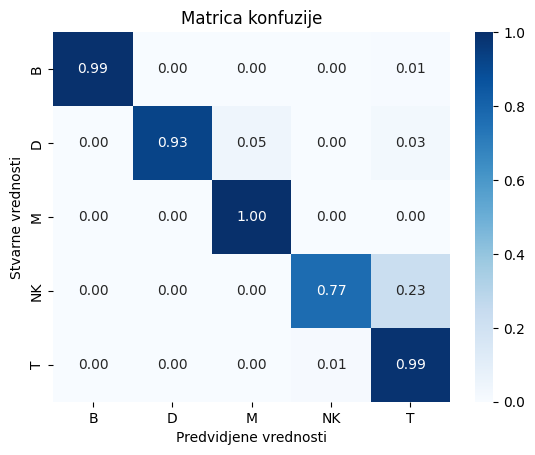

Matrica konfuzije: 
 [[ 587    0    0    1    3]
 [   0   74    4    0    2]
 [   0    0  596    0    0]
 [   0    1    0  207   62]
 [   0    0    2   28 2077]]
Accuracy score:  0.9717343578485181
Precision score:  0.9709032431108919
Recall score:  0.9717343578485181
F1 score:  0.9709732594735321

--------------------------------------



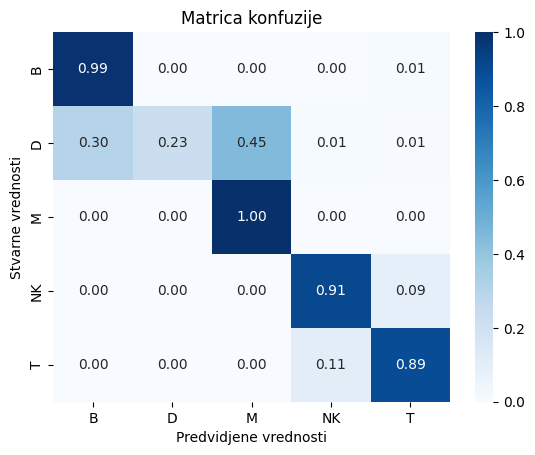

Matrica konfuzije: 
 [[1849    0    3    6   19]
 [  82   62  121    3    2]
 [   0    0 2006    0    0]
 [   0    0    0  766   76]
 [   7    0    8  755 6381]]
Accuracy score:  0.9109171743783961
Precision score:  0.93927416452273
Recall score:  0.9109171743783961
F1 score:  0.9140701543929053


In [14]:
data_bs2 = pd.read_csv('../data/preprocessed_data_BS2.csv')

X = data_bs2.drop(['Group'], axis=1)
y = data_bs2['Group']

X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2 = train_test_split(X, y, test_size=0.3, random_state=55)

model_bs2 = MLPClassifier(**best_params)
model_bs2 = build_model(model_bs2, X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2)
print('\n--------------------------------------\n')

X_test_data = data_bs2.drop(['Group'], axis=1)
y_test_data = data_bs2['Group']

y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)

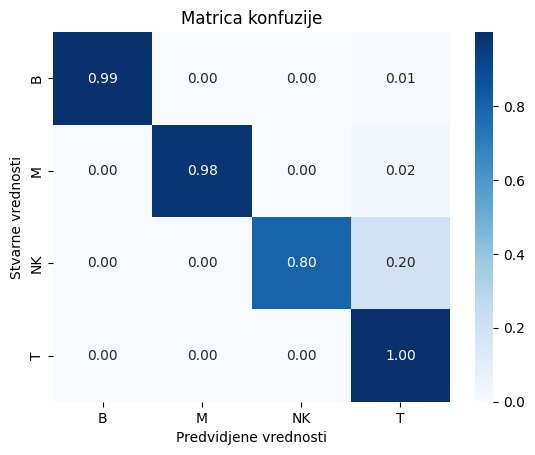

Matrica konfuzije: 
 [[ 513    0    0    3]
 [   0  257    0    6]
 [   0    0   63   16]
 [   1    1    0 4062]]
Accuracy score:  0.9945144250304754
Precision score:  0.994538281003071
Recall score:  0.9945144250304754
F1 score:  0.9943314124925176

--------------------------------------



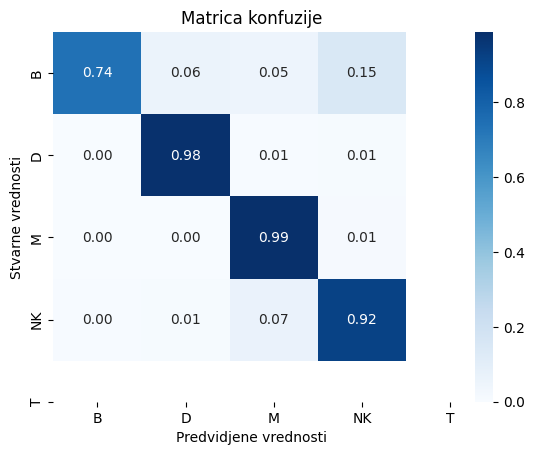

Matrica konfuzije: 
 [[ 1299   108    91   258]
 [    1   841     5     9]
 [    0     0   305     4]
 [   59   120   924 12381]]
Accuracy score:  0.9037488570557757
Precision score:  0.9520395626549406
Recall score:  0.9037488570557757
F1 score:  0.9206329767311426


In [15]:
data_geo = pd.read_csv('../data/preprocessed_data_GEO.csv')

X = data_geo.drop(['Group'], axis=1)
y = data_geo['Group']

X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X, y, test_size=0.3, random_state=55)

model_geo = MLPClassifier(**best_params)
model_geo = build_model(model_geo, X_train_geo, X_test_geo, y_train_geo, y_test_geo, classes=['B', 'M', 'NK', 'T'])
print('\n--------------------------------------\n')

X_test_data = data_geo.drop(['Group'], axis=1)
y_test_data = data_geo['Group']

y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)

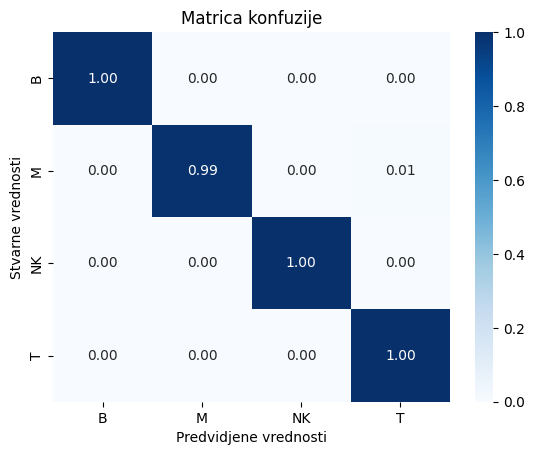

Matrica konfuzije: 
 [[ 2951     0     0     0]
 [    1   531     0     5]
 [    0     1  2412     4]
 [    2     5     2 18815]]
Accuracy score:  0.9991912329653443
Precision score:  0.9991912556599569
Recall score:  0.9991912329653443
F1 score:  0.9991911758907759

--------------------------------------



C:\Users\bogda\AppData\Local\Temp\ipykernel_19564\1779981008.py:4: RuntimeWarning: invalid value encountered in divide
  normalized_conf_matrix = cm / class_sums[:, np.newaxis]


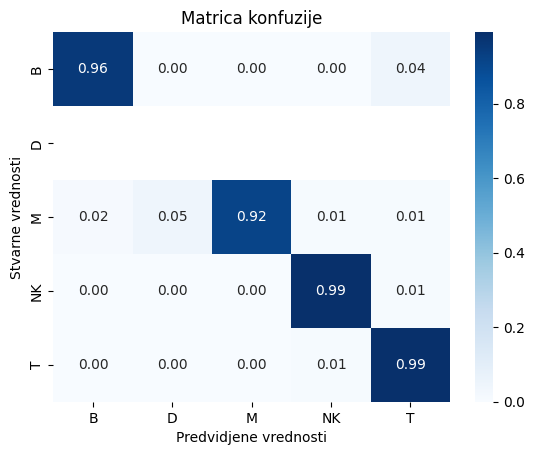

Matrica konfuzije: 
 [[ 9303     0     0     4   418]
 [    0     0     0     0     0]
 [   28    88  1697    17    18]
 [    0     0     1  8113    65]
 [   14    13     1   558 62090]]
Accuracy score:  0.9851385451545591
Precision score:  0.9867473288881069


C:\Users\bogda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall score:  0.9851385451545591
F1 score:  0.9857706241014488


In [11]:
data_10x = pd.read_csv('../data/preprocessed_data_10x.csv')

X = data_10x.drop(['Group'], axis=1)
y = data_10x['Group']

X_train_10x, X_test_10x, y_train_10x, y_test_10x = train_test_split(X, y, test_size=0.3, random_state=55)

model_10x = MLPClassifier(**best_params)
model_10x = build_model(model_10x, X_train_10x, X_test_10x, y_train_10x, y_test_10x, classes=['B', 'M', 'NK', 'T'])
print('\n--------------------------------------\n')

X_test_data = data_10x.drop(['Group'], axis=1)
y_test_data = data_10x['Group']

y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)